Clauder Noronha

2019

Estudo de caso NBA

Saving basquete.jpg to basquete (5).jpg


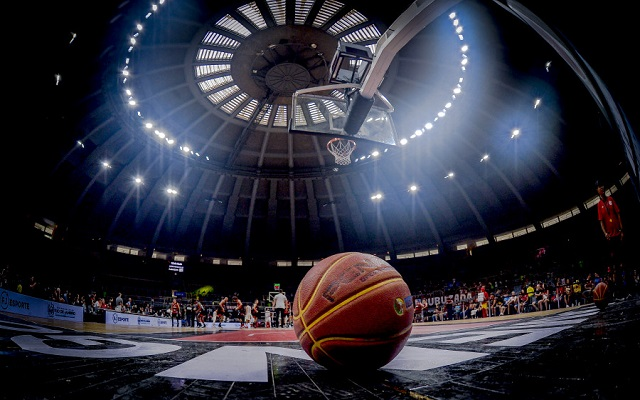

Vou demonstrar um breve estudo dos dados da NBA. Vamos revelar analisar os dados dos times e dos jogadores, como as pricnicpais agilidades de alguns jogadores. No estudo não vou demonstrar a habilidade de cada jogador da NBA. Mas os dados estão no meu repositorio do GitHUb, para eventual estudo e complementação.







[NBA](https://pt.wikipedia.org/wiki/National_Basketball_Association)

>A National Basketball Association (em português: Associação Nacional de Basquetebol; abreviação oficial: NBA) é a principal liga de basquetebol profissional da América do Norte. Com 30 franquias sendo membros da mesma (29 nos Estados Unidos e 1 no Canadá), a NBA também é considerada a principal liga de basquete do mundo. É um membro ativo da USA Basketball (USAB), que é reconhecida pela FIBA (a Federação Internacional de Basquetebol) como a entidade máxima e organizadora do basquetebol nos Estados Unidos. A NBA é uma das 4 'major leagues' de esporte profissional na América do Norte. Os jogadores da NBA são os mais bem pagos esportistas do mundo, por salário médio anual.

A liga foi fundada na cidade de Nova Iorque em 6 de Junho de 1946, como a Basketball Association of America (BAA). A liga adotou o nome de National Basketball Association em 1949 quando se fundiu com a rival National Basketball League (NBL). A liga tem diversos escritórios ao redor do mundo, além de vários dos próprios clubes fora da sede principal na Olympic Tower localizada na Quinta Avenida 645.









Fonte de Dados
Nossa fonte de dados será o site[Bastketaball Reference](https://www.basketball-reference.com/) que mantém todos os detalhes e estatísticas sobre a NBA.

In [ ]:
# Imports para Web Scraping
import bs4
import json
import requests
from bs4 import BeautifulSoup as bs
from bs4 import BeautifulSoup
# Imports para manipulação, visualização e análise de dados
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import pingouin as pg

In [ ]:
#pip install pingouin

In [ ]:
req = requests.get('https://www.basketball-reference.com/leagues/NBA_2019_totals.html')

if req.status_code == 200:
  print('Requisição bem sucedida')
  content = req.content

Requisição bem sucedida


Depois de obter o HTML da página, podemos utilizar a biblioteca BeautifulSoup para extrair a tabela. Primeiro, devemos criar um objeto que irá salvar o documento de maneira estruturada de acordo com as tags, e depois podemos acessar o elemento que quisermos chamando o método find passando como argumento o nome da tag, no caso table.

In [ ]:
soup = BeautifulSoup(content, 'html.parser')
table = soup.find(name='table')

Agora que temos o código HTML da tabela, podemos utilizar o Pandas para carregar os dados em um Data Frame, utilizando o método read_html. Para isto, existem dois pontos para ficar atento: o primeiro é que antes de passar a variável ‘table’ na função, devemos convertê-la para string primeiro, tendo em vista que no momento ela é um objeto do BeautifulSoup; o segundo é que o retorno deste método é sempre uma lista de Data Frames, e portanto devemos acessar a posição 0 dela para obter nossa tabela

In [ ]:
table_str = str(table)
df = pd.read_html(table_str)[0]

E se a página tiver mais de uma tabela?


No caso anterior, a página continha somente uma tabela, então havia somente uma tag table para extrair. No entanto, em muitas páginas existem várias tabelas, como é o caso da página de Classificações da temporada de 2017/2018 da NBA, por exemplo. Neste caso, para obter uma tabela específica existem duas opções:

A primeira é substituir o método find pelo find_all, que retorna uma lista de todos os elementos encontrados ao invés de um só. Nesse caso, é possível acessar a tabela desejada verificando em qual posição do vetor ela se encontra.

A segunda é utilizar o argumento attrs do método find, passando um dicionário que indica quais atributos o elemento obrigatoriamente deve ter para ser extraído. Por exemplo, considerando a página de classificações citada acima e que queremos extrair as colocações dos times na conferência Oeste (Western Conference), usamos o inspetor para verificar que o id dessa tabela é “confs_standings_W”. Portanto, o código ficaria da seguinte forma:

In [ ]:
table = soup.find(name='table', attrs={'id':'confs_standings_W'})

Obtendo estatísticas de várias temporadas


Agora que conseguimos extrair dados de uma única página, seria interessante obter dados de várias temporadas de uma só vez. Comparando a URL de Estatísticas de 2018 com a de 2017, podemos ver que elas são iguais, com exceção do número do ano da temporada.

Com isso, é possível criar um loop que itere sobre uma lista de anos incluindo eles na URL e repetindo o processo da seção anterior para cada uma delas, montando uma grande tabela. Para obter uma lista de todos os anos em um certo intervalo, podemos usar a função range nativa do Python.

O código a seguir cria uma função que faz isso automaticamente, e usa ela para extrair as estatísticas totais de 2013 a 2018. Perceba que uma coluna Year é criada em cada extração para que seja possível diferenciar de qual ano cada estatística pertence no DataFrame principal.

In [ ]:
#Funçãopar extrais um conjunto de tabelas

def scrape_stats(base_url, year_start, year_end):
    years = range(year_start,year_end+1,1)

    final_df = pd.DataFrame()

    for year in years:
        print('Extraindo ano {}'.format(year))
        req_url = base_url.format(year)
        req = requests.get(req_url)
        soup = BeautifulSoup(req.content, 'html.parser')
        table = soup.find('table', {'id':'totals_stats'})
        df = pd.read_html(str(table))[0]
        df['Year'] = year
        final_df = final_df.append(df)
    return final_df
url = 'https://www.basketball-reference.com/leagues/NBA_{}_totals.html'
df = scrape_stats(url, 2013, 2019)

Extraindo ano 2013
Extraindo ano 2014
Extraindo ano 2015
Extraindo ano 2016
Extraindo ano 2017
Extraindo ano 2018
Extraindo ano 2019


Visualizando o conjunto de dados 

In [ ]:
df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Quincy Acy,PF,22,TOR,29,0,342,42,75,.560,1,2,.500,41,73,.562,.567,31,38,.816,30,47,77,11,13,15,17,53,116,2013
1,2,Jeff Adrien,PF,26,CHA,52,5,713,72,168,.429,0,2,.000,72,166,.434,.429,65,100,.650,68,128,196,36,18,27,32,80,209,2013
2,3,Arron Afflalo,SF,27,ORL,64,64,2307,397,905,.439,72,240,.300,325,665,.489,.478,191,223,.857,29,210,239,206,40,11,138,137,1057,2013
3,4,Josh Akognon,PG,26,DAL,3,0,9,2,4,.500,1,2,.500,1,2,.500,.625,0,0,NaN,0,1,1,1,0,0,0,3,5,2013
4,5,Cole Aldrich,C,24,TOT,45,0,388,44,80,.550,0,0,NaN,44,80,.550,.550,12,20,.600,30,90,120,9,5,23,23,60,100,2013


In [ ]:
#Salvando em CSV

#df.to_csv('NBA.csv')

Pequeno exemplo de uso dos dados

Primeiro, algo importante a se fazer é fazer uma pequena limpeza dos dados. Olhando a tabela no site, podemos ver que os nomes das colunas se repetem várias vezes no meio dela. Podemos eliminar essas linhas do Data Frame da seguinte maneira:

In [ ]:
drop_indexes = df[df['Rk'] == 'Rk'].index # Pega indexes onde a coluna 'Rk' possui valor 'Rk'
df.drop(drop_indexes, inplace=True) # elimina os valores dos index passados da tabela

In [ ]:
numeric_cols = df.columns.drop(['Player','Pos','Tm'])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)

ANALISAR OS DADOS 

In [ ]:
df.dtypes

Rk          int64
Player     object
Pos        object
Age         int64
Tm         object
G           int64
GS          int64
MP          int64
FG          int64
FGA         int64
FG%       float64
3P          int64
3PA         int64
3P%       float64
2P          int64
2PA         int64
2P%       float64
eFG%      float64
FT          int64
FTA         int64
FT%       float64
ORB         int64
DRB         int64
TRB         int64
AST         int64
STL         int64
BLK         int64
TOV         int64
PF          int64
PTS         int64
Year        int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3588 entries, 0 to 733
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      3588 non-null   int64  
 1   Player  3588 non-null   object 
 2   Pos     3588 non-null   object 
 3   Age     3588 non-null   int64  
 4   Tm      3588 non-null   object 
 5   G       3588 non-null   int64  
 6   GS      3588 non-null   int64  
 7   MP      3588 non-null   int64  
 8   FG      3588 non-null   int64  
 9   FGA     3588 non-null   int64  
 10  FG%     3564 non-null   float64
 11  3P      3588 non-null   int64  
 12  3PA     3588 non-null   int64  
 13  3P%     3200 non-null   float64
 14  2P      3588 non-null   int64  
 15  2PA     3588 non-null   int64  
 16  2P%     3536 non-null   float64
 17  eFG%    3564 non-null   float64
 18  FT      3588 non-null   int64  
 19  FTA     3588 non-null   int64  
 20  FT%     3406 non-null   float64
 21  ORB     3588 non-null   int64  
 22  D

In [ ]:
NBA = pd.DataFrame(df)

In [ ]:
NBA.head(3)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Quincy Acy,PF,22,TOR,29,0,342,42,75,0.560,1,2,0.5,41,73,0.562,0.567,31,38,0.816,30,47,77,11,13,15,17,53,116,2013
1,2,Jeff Adrien,PF,26,CHA,52,5,713,72,168,0.429,0,2,0.0,72,166,0.434,0.429,65,100,0.650,68,128,196,36,18,27,32,80,209,2013
2,3,Arron Afflalo,SF,27,ORL,64,64,2307,397,905,0.439,72,240,0.3,325,665,0.489,0.478,191,223,0.857,29,210,239,206,40,11,138,137,1057,2013


In [ ]:
#Transformar em data
#NBA['Year'] = pd.to_datetime(NBA['Year'])


Qual a idade média dos jogadores que disputaram a temporada  da NBA?

In [ ]:
NBA['Age'].mean()

26.469620958751392

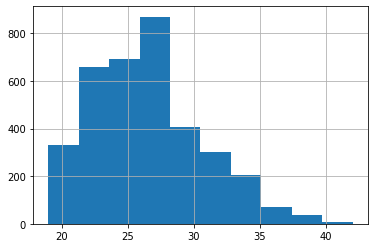

In [ ]:
#Histograma

NBA['Age'].hist()
plt.show()

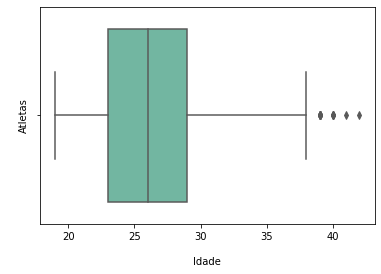

In [ ]:
#Criar um BoxPlot

ax = sns.boxplot(x = NBA['Age'], palette='Set2', orient= "h")
plt.ylabel('\nAtletas')
plt.xlabel('\nIdade')
plt.show()

Claramente a idade média dos atletas é de 25 a 29 anos. E perceba que temos alguns outliers. Será que a variável idade segue uma distribuição normal? Vamos checar.

In [ ]:
#Teste de normalidade com Pingouin

x = NBA['Age']
pg.normality(x)

,W,pval,normal
Age,0.963475,3.303646e-29,False


Quais são os jogadores com maior número de pontos por jogo? Selecione os Top 10.

In [ ]:
#Agrupar os dados por jogador e total de pontos

NBA_top = NBA.groupby(['Player'])['PTS'].sum().reset_index().rename(columns={'PTS':'Total_Pontos'})
NBA_top

,Player,Total_Pontos
0,A.J. Hammons,48
1,A.J. Price,177
2,Aaron Brooks,2574
3,Aaron Gordon,2208
4,Aaron Gray,130
...,...,...
988,Zhaire Smith,40
989,Zhou Qi,2
990,Zoran Dragić,34
991,Álex Abrines,924


In [ ]:
#Mostrar os 10 melhores

NBA_top = NBA_top.nlargest(10,'Total_Pontos')
NBA_top

,Player,Total_Pontos
413,James Harden,15832
565,Kevin Durant,12276
225,DeMar DeRozan,11805
873,Stephen Curry,11287
83,Blake Griffin,11229
186,Damian Lillard,11214
601,LaMarcus Aldridge,10860
824,Russell Westbrook,10372
557,Kemba Walker,9521
581,Klay Thompson,9398


Quantos jogos os jogadores com 35 anos de idade ou mais iniciaram (variável GS)?

In [ ]:
def jogadores35():
    print('\nJogadores com mais de 35 anos e jogos disputados.\n')
    print('Jogador:          | Jogos:')
    print('------------------+--------')
    for index, row in NBA.iterrows():
        if row['Age'] >= 35:
            print('{:<17} | {:>6}'.format(row['Player'], row['GS']))

In [ ]:
jogadores35()


Jogadores com mais de 35 anos e jogos disputados.

Jogador:          | Jogos:
------------------+--------
Ray Allen*        |      0
Chauncey Billups  |     22
Marcus Camby      |      4
Vince Carter      |      3
Tim Duncan*       |     69
Derek Fisher      |      9
Derek Fisher      |      0
Kevin Garnett*    |     68
Manu Ginóbili     |      0
Grant Hill*       |      0
Juwan Howard      |      2
Mike James        |     23
Antawn Jamison    |      6
Jason Kidd*       |     48
Andre Miller      |     11
Steve Nash*       |     50
Pablo Prigioni    |     18
Jerry Stackhouse  |      0
Jason Terry       |     24
Kurt Thomas       |     17
Ray Allen*        |      9
Chauncey Billups  |      7
Vince Carter      |      0
Jason Collins     |      1
Tim Duncan*       |     74
Melvin Ely        |      0
Derek Fisher      |      0
Kevin Garnett*    |     54
Manu Ginóbili     |      3
Mike James        |      0
Antawn Jamison    |      0
Shawn Marion      |     76
Kenyon Martin     |     15
An

Gráfico que mostra a relação entre rebotes ofensivos e minutos jogados.

In [ ]:
# Função
def gera_grafico_reb_ofensivos():
    plt.figure(figsize = [10,10])
    sns.set()
    sns.regplot(x = NBA['MP'], y = NBA['ORB'], color = '#AA2F2F', marker = '+')
    plt.xlabel('\nMinutos Jogados (por jogo)\n', fontsize = 14, color = 'black')
    plt.ylabel('\nRebotes Ofensivos (por jogo)\n', fontsize = 14, color = 'black')
    plt.title('\nMinutos Jogados x Rebotes Ofensivos\n', fontsize = 20)
    plt.show()

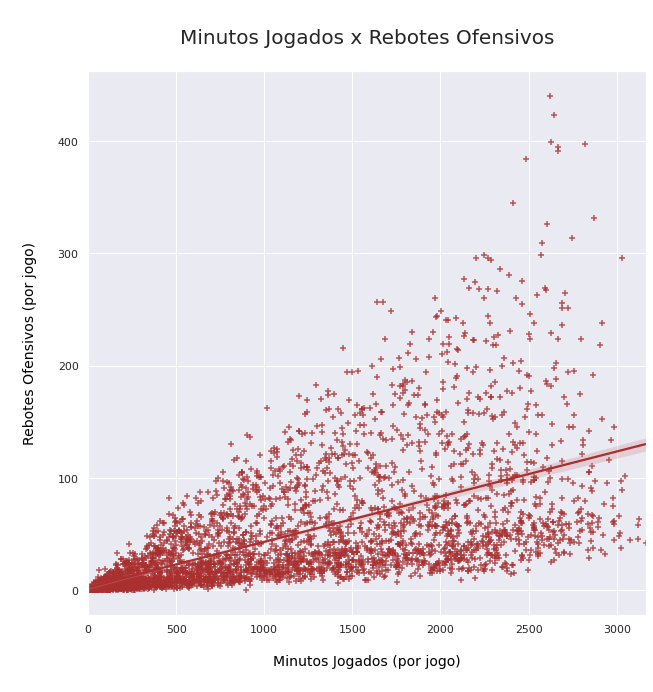

In [ ]:
#Executar a função
gera_grafico_reb_ofensivos()

Aumenta a dispersão dos dados à media que aumenta o número de minutos jogados. Ou seja, com os jogadores mais cansados ao final do jogo é mais difícil fazer rebotes ofensivos.

Que tal criar um modelo de regressão linear e prever o total de rebotes ofensivos em determinado ponto do jogo? Parece legal? Então deixaremos isso com você!

Gráfico que mostra a relação entre rebotes defensivos e minutos jogados.


O que podemos concluir a partir do gráfico?

In [ ]:
def reb_defensivo():
  plt.figure(figsize= [10,10])
  sns.set()
  sns.regplot(x= NBA['MP'], y = NBA['DRB'], color= '#F244AA', marker = '+')
  plt.xlabel('\nMinutos Jogados(por jogo)\n', fontsize = 14, color = 'black')
  plt.ylabel('\nRebote defensivo(por jogo)\n', fontsize = 14, color = 'black')
  plt.title('\nMinuto Jogo X Rebote Defensivo', fontsize = 20)
  plt.show()

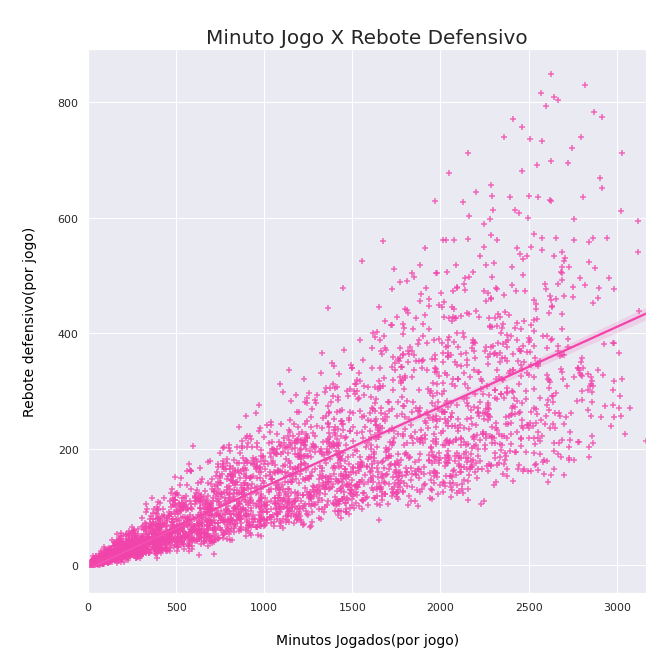

In [ ]:
reb_defensivo()

Encontramos o comportamento dos rebotes segue um padrão diferente dos rebotes ofensivos. 

As equipes itensificam suas defesas e consequentemente aumenta o número de rebotes defensivos.

In [ ]:
NBA.head(5)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Quincy Acy,PF,22,TOR,29,0,342,42,75,0.560,1,2,0.5,41,73,0.562,0.567,31,38,0.816,30,47,77,11,13,15,17,53,116,2013
1,2,Jeff Adrien,PF,26,CHA,52,5,713,72,168,0.429,0,2,0.0,72,166,0.434,0.429,65,100,0.650,68,128,196,36,18,27,32,80,209,2013
2,3,Arron Afflalo,SF,27,ORL,64,64,2307,397,905,0.439,72,240,0.3,325,665,0.489,0.478,191,223,0.857,29,210,239,206,40,11,138,137,1057,2013
3,4,Josh Akognon,PG,26,DAL,3,0,9,2,4,0.500,1,2,0.5,1,2,0.500,0.625,0,0,NaN,0,1,1,1,0,0,0,3,5,2013
4,5,Cole Aldrich,C,24,TOT,45,0,388,44,80,0.550,0,0,NaN,44,80,0.550,0.550,12,20,0.600,30,90,120,9,5,23,23,60,100,2013


Vamos buscar os jogadores que mais deram Rebotes.

In [ ]:
#Função

def rebotes():
  print('\Jogadores que deram o maior numero de rebotes')
  print('JOgador:      |  Idade      | Time       |  Rebotes')
  print('--------------+-------------+------------+-----------')
  for index, row in NBA.iterrows():
    if row['DRB'] > 700:
      print('{:<16} | {:>8} | {:<19} | {:<6}'.format(row['Player'], row['Age'], row['Tm'], row['DRB']))

In [ ]:
rebotes()

\Jogadores que deram o maior numero de rebotes
JOgador:      |  Idade      | Time       |  Rebotes
--------------+-------------+------------+-----------
DeAndre Jordan   |       25 | LAC                 | 783   
Kevin Love       |       25 | MIN                 | 739   
DeAndre Jordan   |       26 | LAC                 | 829   
Andre Drummond   |       22 | DET                 | 803   
DeAndre Jordan   |       27 | LAC                 | 792   
Andre Drummond   |       23 | DET                 | 770   
Rudy Gobert      |       24 | UTA                 | 721   
DeAndre Jordan   |       28 | LAC                 | 816   
Karl-Anthony Towns |       21 | MIN                 | 711   
Andre Drummond   |       24 | DET                 | 848   
Dwight Howard    |       32 | CHO                 | 757   
Karl-Anthony Towns |       22 | MIN                 | 774   
Giannis Antetokounmpo |       24 | MIL                 | 739   
Andre Drummond   |       25 | DET                 | 809   
Joel Embiid 

Criamos uma tabela com os jogadores que mais deram rebotes em 4 temporadas da NBA. 

Observamos que a faixa etária dos jogadores é até 30 anos. O mais velho é o jogador Dwight Howard, tem 32 anos. Para saber um pouco de sua Historia [Clique Aqui (Dwight Howard )](https://pt.wikipedia.org/wiki/Dwight_Howard)

para fechar com chave de ouro temos o jogador com maior numero de rebotes, ele tem 26 anos e nada mais nada menos do que 829 rebotes. Tem o nome familiar (JORDAN) DeAndre Jordan. Será que esse sobre nome tem peso? [Clique Aqui(DeAndre Jordan )](https://pt.wikipedia.org/wiki/DeAndre_Jordan) 

Clauder Noronha

2019